In [1]:
%matplotlib inline

In [2]:
#import stuff
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random  #*****for later *****

# q5

In [79]:
# helper functions
def approx_cluster(G, node_num):
    # G: graph
    # n: number of nodes
    nodes = [n for n in random.sample(G.nodes(), node_num)]
    return np.average(list(nx.clustering(G, nodes).values()))
def approx_apl(G, node_num):
    # G: graph
    # n: number of nodes
    ave = 0
    nodes = [n for n in random.sample(G.nodes(), node_num)]
    for n in nodes:
        paths=nx.shortest_path_length(G, n)
        ave+=np.average(list(paths.values()))
    ave = ave/node_num
    return ave
def diff_err(n, o):
    return abs(n-o)/o

In [72]:
G5 = nx.gnp_random_graph(n=10000,p=0.01)

In [78]:
G5_clustering = nx.average_clustering(G5)
print(G5_clustering)
#  too slow
# nx.average_shortest_path_length(G5)

0.010046196525655457


In [289]:
clusterings = []
pathlengths = []
for node_num in [10,100,1000]:
    clusterings.append(approx_cluster(G5, node_num))
    # its really slow ahhh
    pathlengths.append(approx_apl(G5, node_num))
print('clustering',clusterings)
print('ave',pathlengths)

clustering [0.009925079551587796, 0.009943599754800662, 0.010009335393064128]
ave [2.3305, 2.352179, 2.3544737]


In [102]:
for c in clusterings:
    print(diff_err(c, G5_clustering))

0.012056002862213434
0.010212498888787268
0.0036691630008626017


In [87]:
# clusterings = []
errors = []
cvals = []
for i in range(100):
    clust = approx_cluster(G5, 100)
    print(clust)
    cvals.append(clust)
    er = diff_err(clust, G5_clustering)
    print(er)
    errors.append(er)

0.01007471768269121
0.002839000507596751
0.009995892767807933
0.005007244056898647
0.010096778769200178
0.005034964567490486
0.010091018793705789
0.004461615690661342
0.00992604932975439
0.011959470989268577
0.010093422406825328
0.004700871722872246
0.009821372319858171
0.02237903720309883
0.010243761147734237
0.019665613904152637
0.009956867304997195
0.008891844832035414
0.009814908952761879
0.023022401791855055
0.01004801880884854
0.00018139035887165814
0.009904114204151757
0.014142896880511733
0.00992045586938934
0.012516244923639215
0.010075302013915386
0.002897164930588475
0.01030504760823989
0.025766077930427973
0.010114428510100052
0.006791822583835401
0.010105336635332283
0.005886815923399158
0.010016263854827678
0.0029795028149547055
0.009823061298258358
0.022210916024514107
0.010235932332824224
0.018886332422845802
0.010071433028903414
0.002512045547139077
0.010104495433906917
0.00580308259972612
0.009781599147316628
0.02633806512376241
0.009913075967556534
0.0132508415258418

(array([35., 22., 17., 13., 10.,  2.,  0.,  0.,  0.,  1.]),
 array([7.26101081e-05, 6.02628420e-03, 1.19799583e-02, 1.79336324e-02,
        2.38873065e-02, 2.98409806e-02, 3.57946547e-02, 4.17483288e-02,
        4.77020028e-02, 5.36556769e-02, 5.96093510e-02]),
 <a list of 10 Patch objects>)

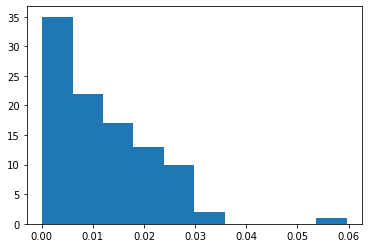

In [88]:
plt.hist(errors)

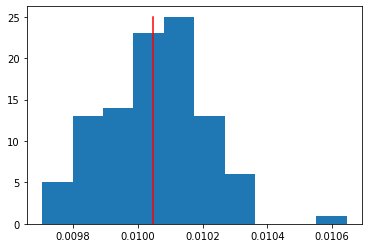

In [92]:
plt.hist(cvals)
plt.plot([G5_clustering]*2,[0,25],'red')

# q6

In [95]:
from timeit import default_timer as timer

In [293]:
graph_node_num = 95000
p = 10/graph_node_num
G6 = nx.fast_gnp_random_graph(n=graph_node_num, p=p)
start = timer()
nx.average_clustering(G6)
end = timer()
print(end - start) 

10.187750942001003


In [292]:
graph_node_num = 1000
p = 10/graph_node_num
G6 = nx.fast_gnp_random_graph(n=graph_node_num, p=p)
start = timer()
approx_cluster(G6,1000)
end = timer()
print(end - start)

248.98403384699998
cluster approx start
0.2403475559999606


# q7

In [254]:
# helper functions
def find_giant_scc(G):
    return sorted([i for  i in nx.strongly_connected_components(G)], key=lambda x: -len(x))[0]

def find_pagerank_largest_smallest(G):
    ranks = nx.pagerank(G)
    ranks = { i:j for i,j in sorted(ranks.items(), key=lambda x: x[1])}
#     return (ranks[0:5],ranks[-5:-1])
    n = {k: v for k, v in sorted(ranks.items(), key=lambda item: item[1])}
    firsts = []
    lasts = []
    for num,(k,v) in enumerate(n.items()):
        if num<5: firsts.append(k)
        elif num>len(n)-6: lasts.append(k)

    return (firsts,lasts)
    
def find_indegree_largest_smallest(G):
    degrees = G.in_degree()
    degrees = sorted(degrees, key=lambda x: x[1])
    degrees = {i:j for i,j in degrees}
    n = {k: v for k, v in sorted(degrees.items(), key=lambda item: item[1])}
    firsts = []
    lasts = []
    for num,(k,v) in enumerate(n.items()):
        if num<5: firsts.append(k)
        elif num>len(n)-6: lasts.append(k)
    return (firsts,lasts)

def find_giant_component(G):
    # input: G <nx.Graph>
    # output: (giant_component <nx.Graph>, size_of_component <int> )
    G = nx.Graph(G)
    c=sorted(nx.connected_components(G), key = len, reverse=True)
    cl = list(c)
    H = G.subgraph(cl[0])
    size = len(cl[0])
    return (H, size)
def use_degree_as_node_size(G):
    G_fb = G
    pos = nx.spring_layout(G_fb)
    betCent = nx.betweenness_centrality(G_fb, normalized=True, endpoints=True)
    node_color = [20000.0 * G_fb.degree(v) for v in G_fb]
    node_size =  [v * 10000 for v in betCent.values()]
    plt.figure(figsize=(20,20))
    nx.draw_networkx(G_fb, pos=pos, with_labels=False,
                     node_color=node_color,
                     node_size=node_size )
    plt.axis('off')

In [252]:
seventh_path = '/Users/xieewenz/Downloads/moreno_seventh 2/out.moreno_seventh_seventh'
G_7th = nx.read_weighted_edgelist(seventh_path, create_using=nx.DiGraph)


Name: 
Type: DiGraph
Number of nodes: 29
Number of edges: 376
Average in degree:  12.9655
Average out degree:  12.9655
['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29']


In [265]:
print(list(G_7th.nodes()))
gscc_7 = find_giant_scc(G_7th)
gc_7,_ = find_giant_component(G_7th)
[gscc_7, gc_7]
print(list(gscc_7))
assert len(list(G_7th.nodes())) == len(list(gscc_7)) 
assert len(list(G_7th.nodes())) == len(list(gc_7.nodes()))
# no assertion error

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29']
['3', '9', '17', '29', '12', '25', '14', '4', '11', '26', '6', '8', '18', '21', '15', '19', '20', '10', '24', '16', '22', '13', '27', '5', '7', '23', '28', '2', '1']


(['22', '7', '28', '4', '19'], ['12', '9', '8', '13', '21']) (['22', '4', '18', '19', '28'], ['23', '14', '11', '8', '9'])


0

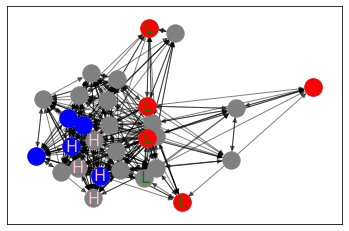

In [296]:
pagerank_7 = find_pagerank_largest_smallest(G_7th)
indegree_7 = find_indegree_largest_smallest(G_7th)
print(pagerank_7, indegree_7)

pos=nx.spring_layout(G_7th) # positions for all nodes
# nx.draw_networkx(dg)
# nx.draw_networkx_labels(G_7th,pos,font_size=12)
nx.draw_networkx_labels(dg,pos,{i:'H' for i in pagerank_7[1]},font_size=16,font_color='pink')
nx.draw_networkx_labels(dg,pos,{i:'L' for i in pagerank_7[0]},font_size=16, font_color='green')

nx.draw_networkx_nodes(G_7th, pos, node_color='grey')
nx.draw_networkx_nodes(G_7th, pos,nodelist=indegree_7[0], node_color='r')
nx.draw_networkx_nodes(G_7th, pos,nodelist=indegree_7[1], node_color='b')
nx.draw_networkx_edges(G_7th,pos,width=1.0,alpha=0.5)
0

In [288]:
high_path = '/Users/xieewenz/Downloads/moreno_highschool/out.moreno_highschool_highschool'

G_high = nx.read_weighted_edgelist(high_path, create_using=nx.DiGraph)
print(nx.info(G_high))
nodes_high = list(G_high.nodes())
print(nodes_high)
gscc_high = find_giant_scc(G_high)
gc_high,_ = find_giant_component(G_high)
[gscc_high, gc_high]
print(list(gscc_high))
for i in list(gscc_high):
    nodes_high.remove(i)
print(nodes_high)
# assert len(list(G_high.nodes())) == len(list(gscc_high)) 
assert len(list(G_high.nodes())) == len(list(gc_high.nodes()))
# no assertion error

Name: 
Type: DiGraph
Number of nodes: 70
Number of edges: 366
Average in degree:   5.2286
Average out degree:   5.2286
['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70']
['3', '31', '53', '9', '51', '29', '17', '12', '25', '34', '35', '56', '65', '14', '4', '57', '11', '26', '44', '61', '6', '38', '18', '69', '21', '32', '15', '63', '33', '41', '19', '68', '60', '49', '20', '45', '24', '55', '30', '37', '16', '70', '42', '67', '22', '43', '40', '59', '13', '36', '54', '27', '58', '39', '5', '7', '64', '46', '52', '23', '48', '50', '66', '28', '62', '2', '1']
['8', '10', '47']


(['8', '10', '47', '48', '29'], ['43', '67', '68', '28', '46']) (['8', '10', '47', '24', '29'], ['4', '5', '7', '46', '28'])


/Users/xieewenz/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/xieewenz/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


0

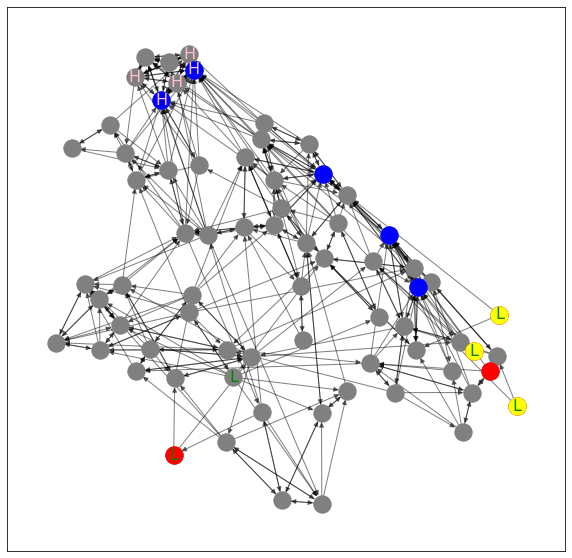

In [271]:

gscc_high = find_giant_scc(G_high)
pagerank_high = find_pagerank_largest_smallest(G_high)
indegree_high = find_indegree_largest_smallest(G_high)
print(pagerank_high, indegree_high)

plt.figure(figsize=(10,10))
pos=nx.spring_layout(G_high) # positions for all nodes
# nx.draw_networkx(dg)
# nx.draw_networkx_labels(G_high,pos,font_size=12)
nx.draw_networkx_labels(dg,pos,{i:'H' for i in pagerank_high[1]},font_size=16,font_color='pink')
nx.draw_networkx_labels(dg,pos,{i:'L' for i in pagerank_high[0]},font_size=16, font_color='green')

nx.draw_networkx_nodes(G_high, pos, node_color='grey')
nx.draw_networkx_nodes(G_high, pos,nodelist=indegree_high[0], node_color='r')
nx.draw_networkx_nodes(G_high, pos,nodelist=indegree_high[1], node_color='b')
nx.draw_networkx_nodes(G_high, pos,nodelist=['8', '10', '47'], node_color='yellow')
nx.draw_networkx_edges(G_high,pos,width=1.0,alpha=0.5)
0

# q8

In [108]:
G = nx.DiGraph()
G.add_edges_from([[0,1],[1,2],[2,0],[0,2]])
# nx.pagerank(G)
# nx.draw_networkx(G) 

In [110]:
G.add_node(4)
nx.pagerank(G)
# nx.draw_networkx(G) 

{0: 0.36932348383275215,
 1: 0.2045818512236631,
 2: 0.37847561732453716,
 4: 0.047619047619047644}

{0: 0.29211832775429014,
 1: 0.16181542781004757,
 2: 0.2993578000642366,
 4: 0.1337125614934878,
 5: 0.03766529429264595,
 6: 0.03766529429264595,
 7: 0.03766529429264595}

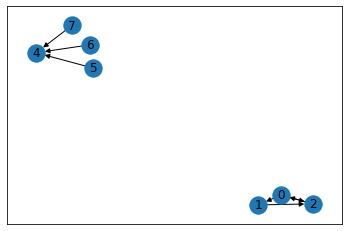

In [17]:
G = nx.DiGraph()
G.add_edges_from([[0,1],[1,2],[2,0],[0,2]])
G.add_edges_from(((5,4),(6,4),(7,4)))
nx.draw_networkx(G) 
nx.pagerank(G)

{0: 0.3423916323467881, 1: 0.1708072219363027, 2: 0.3159939237806064, 4: 0.1708072219363027}
{0: 0.3272186508370424, 1: 0.21086953619809864, 2: 0.3004896430721129, 4: 0.1614221698927461}
{0: 0.23399409302983168, 1: 0.18667071963808068, 2: 0.345341094302256, 4: 0.23399409302983168}


Text(0.5, 1.0, '0.233')

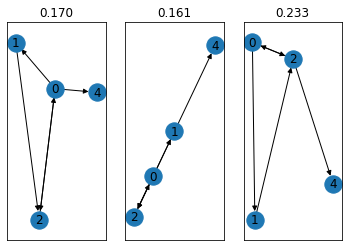

In [276]:
# plt.figure(figsize=(15,10))

G = nx.DiGraph()
G.add_edges_from([[0,1],[1,2],[2,0],[0,2],[0,4]])
plt.subplot(131)
nx.draw_networkx(G) 
print(nx.pagerank(G))
plt.title(str(nx.pagerank(G)[4])[0:5])

G = nx.DiGraph()
G.add_edges_from([[0,1],[1,2],[2,0],[0,2],[1,4]])
plt.subplot(132)
nx.draw_networkx(G) 
print(nx.pagerank(G))
plt.title(str(nx.pagerank(G)[4])[0:5])

G = nx.DiGraph()
G.add_edges_from([[0,1],[1,2],[2,0],[0,2],[2,4]])
plt.subplot(133)
nx.draw_networkx(G) 
print(nx.pagerank(G))
plt.title(str(nx.pagerank(G)[4])[0:5])

{0: 0.2207799878120778, 1: 0.19594362153953246, 2: 0.27922001218792214, 4: 0.3040563784604675}
{0: 0.3091751316110233, 1: 0.17943499885545924, 2: 0.25569493476675864, 4: 0.25569493476675864}
{0: 0.2308980544047774, 1: 0.1658885141703212, 2: 0.3068945349107655, 4: 0.2963188965141358}


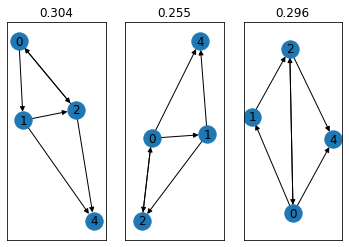

In [120]:
# plt.figure(figsize=(10,6))
counter = 0
all_ = [[[2,4],[1,4]],[[1,4],[0,4]],[[2,4],[0,4]]]
for i,j in all_:
    counter+=1
    G = nx.DiGraph()
    G.add_edges_from([[0,1],[1,2],[2,0],[0,2],i,j])
    plt.subplot(130+counter)
    nx.draw_networkx(G) 
    print(nx.pagerank(G))
    plt.title(str(nx.pagerank(G)[4])[0:5])


{0: 0.17543861174983252, 1: 0.2277621183231399, 2: 0.32456138825016745, 4: 0.27223788167686014}
{0: 0.32456093581768314, 1: 0.22514635472743894, 2: 0.22514635472743896, 4: 0.22514635472743896}
{0: 0.28895928662720183, 1: 0.11937184094720207, 2: 0.3314360854032793, 4: 0.2602327870223167}


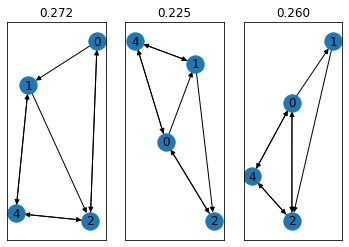

In [119]:
def rev(i):
    return [i[1],i[0]]
counter = 0
# plt.figure(figsize=(10,6))
all_ = [[[2,4],[1,4]],[[1,4],[0,4]],[[2,4],[0,4]]]
for i,j in all_:
    counter+=1
    G = nx.DiGraph()
    G.add_edges_from([[0,1],[1,2],[2,0],[0,2],i,j,rev(i),rev(j)])
    plt.subplot(130+counter)
    nx.draw_networkx(G) 
    print(nx.pagerank(G))
    plt.title(str(nx.pagerank(G)[4])[0:5])


{0: 0.1661964741152566,
 1: 0.09206207292755549,
 2: 0.17031288152861654,
 5: 0.16511959326567316,
 4: 0.06821245617404126,
 6: 0.18939232754596008,
 7: 0.14870419444289695}

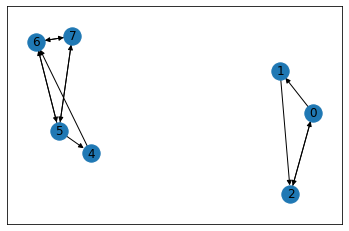

In [287]:
G = nx.DiGraph()
G.add_edges_from([[0,1],[1,2],[2,0],[0,2]])
G.add_edges_from(((5,4),(4,6)))
G.add_edges_from(((5,6),(6,7),(7,5),(6,5),(7,6),(5,7)))
nx.draw_networkx(G) 
nx.pagerank(G)

In [7]:
G00 = nx.read_pajek('/Users/xieewenz/Downloads/Movies.paj')

G00
# nx.draw_networkx(G00)

ValueError: too many values to unpack (expected 2)

In [ ]:
Gkk = 